In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from itertools import product
import statistics as sts

#function to calculate simple k means. Data is the .csv file of a set of two-dimenional points, k_value is the chosen k, and iterations is the number of times the kmeans algorithm runs
def simple_k_means(data, k_value, iterations):
    data = pd.read_csv(data)
    dataset = data.values
    column1 = data.iloc[:,0]
    column2 = data.iloc[:,1]
   

    #Generate all possible combinations for centroid coordinates, assuming a range from 0 to the max value of each column
    list1, list2 = range(0,max(column1)), range(0,max(column2))
    centroid_combinations = list(product(list1, list2))

  
    #Assign a random centroid coordinate to k_value number of centroids
    random_centroids = random.sample(centroid_combinations, k_value)

    centroids = {}

    for i in range(k_value):
        centroids[i] = random_centroids[i]

    for i in range(iterations):
    #calculate Euclidean distances from each of the points to each centroid.

        #distance_calculations stores the distance from each centroid for each point in the dataset into a dictionary
        distance_calculations = {}
        for j in range(len(dataset)):
            distance_calculations[j] = []

        #calculating Euclidean distances
        for j in range(len(dataset)):
            for k in range(k_value):
                distance_calculations[j].append(np.linalg.norm(dataset[j] - centroids[k]))

        #Find the lowest euclidean distance and assign each of the points to a centroid 
        centroid_points = {}
        for j in range(k_value):
            centroid_points[j] = []

        for j in range(len(dataset)):
            lowest_distance = min(distance_calculations[j])
            lowest_distance_index = distance_calculations[j].index(lowest_distance)
            centroid_points[lowest_distance_index].append(dataset[j])

        #find average of points in each centroid to make the new centroids
        centroids = {}
        for j in range(k_value):
            centroids[j] = sum(centroid_points[j])/len(centroid_points[j])
        #This then repeats, where the distance to the new centroid is calculated and goes as many times listed as the iterations
        
    #print out the points that belong to each cluster
    for i in range(k_value):
        print('These points belong to cluster ' + str(i))
        print(centroid_points[i])
        
    #print out final centroid coordinates    
    for i in range(k_value):
        print('The coordinates of centroid ' + str(i) + ' are:')
        print(centroids[i])
    
    #quick plots to show a plot of the cluster and the centroids for k=2 
    x = {}
    y = {}

    for i in range(k_value):
        x[i] = []

    for i in range(k_value):
        y[i] = []
    
    for i in range(k_value):
        for j in range(len(centroid_points[i])):
            x[i].append(centroid_points[i][j][0])
        
    for i in range(k_value):
        for j in range(len(centroid_points[i])):
            y[i].append(centroid_points[i][j][1])
            
    fig, ax = plt.subplots()
    ax.scatter(x[0], y[0], color="blue", alpha=0.2)
    ax.scatter(x[1], y[1], color="red", alpha=0.2)
    plt.plot(centroids[0][0], centroids[0][1], 'x')
    plt.plot(centroids[1][0], centroids[1][1], 'x') 

These points belong to cluster 0
[array([2, 1]), array([2, 1]), array([3, 2]), array([3, 2]), array([3, 1]), array([2, 1]), array([2, 1]), array([1, 1]), array([3, 1]), array([2, 2]), array([3, 2]), array([2, 2]), array([2, 1]), array([1, 1]), array([2, 1]), array([3, 2]), array([2, 1]), array([3, 1]), array([2, 1]), array([3, 2]), array([3, 2]), array([2, 1]), array([2, 2]), array([2, 1]), array([1, 1]), array([1, 1]), array([2, 2]), array([3, 2]), array([3, 1]), array([1, 1]), array([2, 1]), array([3, 2]), array([2, 1]), array([2, 1]), array([3, 2]), array([3, 2]), array([3, 2]), array([2, 1]), array([3, 2]), array([2, 1]), array([2, 1]), array([2, 1]), array([3, 1]), array([2, 1]), array([2, 1]), array([2, 1]), array([3, 1]), array([3, 1]), array([3, 1]), array([2, 1]), array([3, 2]), array([3, 2]), array([3, 1]), array([2, 1]), array([3, 2]), array([2, 1]), array([3, 2]), array([3, 1]), array([3, 2]), array([3, 1]), array([2, 2]), array([3, 2]), array([3, 1]), array([3, 1]), array(

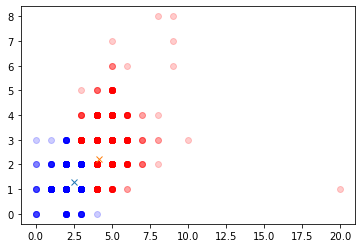

In [196]:
#example dataset contains data from a melbourne realestate dataset. The columns are the number of bedrooms and bathrooms a house has
simple_k_means('melb_data_subset.csv', 2, 5)

These points belong to cluster 0
[array([20,  1])]
These points belong to cluster 1
[array([2, 1]), array([2, 1]), array([3, 2]), array([3, 2]), array([3, 1]), array([2, 1]), array([4, 2]), array([2, 1]), array([1, 1]), array([3, 1]), array([2, 2]), array([3, 2]), array([2, 2]), array([2, 1]), array([1, 1]), array([2, 1]), array([3, 2]), array([2, 1]), array([3, 1]), array([2, 1]), array([4, 2]), array([3, 2]), array([3, 2]), array([2, 1]), array([2, 2]), array([2, 1]), array([1, 1]), array([3, 3]), array([1, 1]), array([2, 2]), array([4, 3]), array([3, 2]), array([3, 1]), array([1, 1]), array([2, 1]), array([3, 2]), array([2, 1]), array([2, 1]), array([3, 2]), array([3, 2]), array([3, 2]), array([2, 1]), array([3, 2]), array([2, 1]), array([2, 1]), array([2, 1]), array([3, 1]), array([6, 3]), array([2, 1]), array([2, 1]), array([2, 1]), array([3, 1]), array([3, 1]), array([3, 1]), array([2, 1]), array([3, 2]), array([3, 2]), array([3, 1]), array([2, 1]), array([3, 2]), array([2, 1]), 

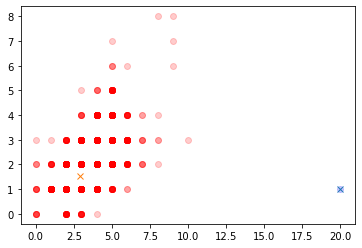

In [197]:
#example with more iterations
simple_k_means('melb_data_subset.csv', 2, 20)